# Fraud Detection Model

## 1. Introduction

This notebook focuses on building a fraud detection model using machine learning to predict fraudulent transactions. We'll walk through the data preprocessing steps, model building, evaluation, and finally, address the key business questions.

## 2. Exploring data

In [29]:
import pandas as pd

In [30]:
data = pd.read_csv("C:\\Users\\Yashodhan P A\\Downloads\\Fraud.csv")

In [31]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [33]:
data.shape

(6362620, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [35]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [36]:
print("Types -",data['type'].unique())
print("isFraud -", data['isFraud'].unique())
print("isFlaggedFraud -", data['isFlaggedFraud'].unique())

Types - ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
isFraud - [0 1]
isFlaggedFraud - [0 1]


In [37]:
print("Count of fraud -", data.loc[data['isFraud'] == 1].shape)
print()
data.loc[data['isFraud'] == 1].head(7)

Count of fraud - (8213, 11)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.0,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.0,0.0,C667346055,102.0,9291619.62,1,0


In [38]:
data.loc[data['isFlaggedFraud'] == 1].shape

(16, 11)

## 3. Data Preprocessing

In [39]:
# Removed irrelevant columns (nameOrig, nameDest).

data = data.drop('nameOrig', axis = 1)
data = data.drop("nameDest", axis = 1)

In [40]:
print(data.columns)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')



__DATA CLEANING__

In [41]:
# 1.Missing values

data.isnull().sum() # There is no null values

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

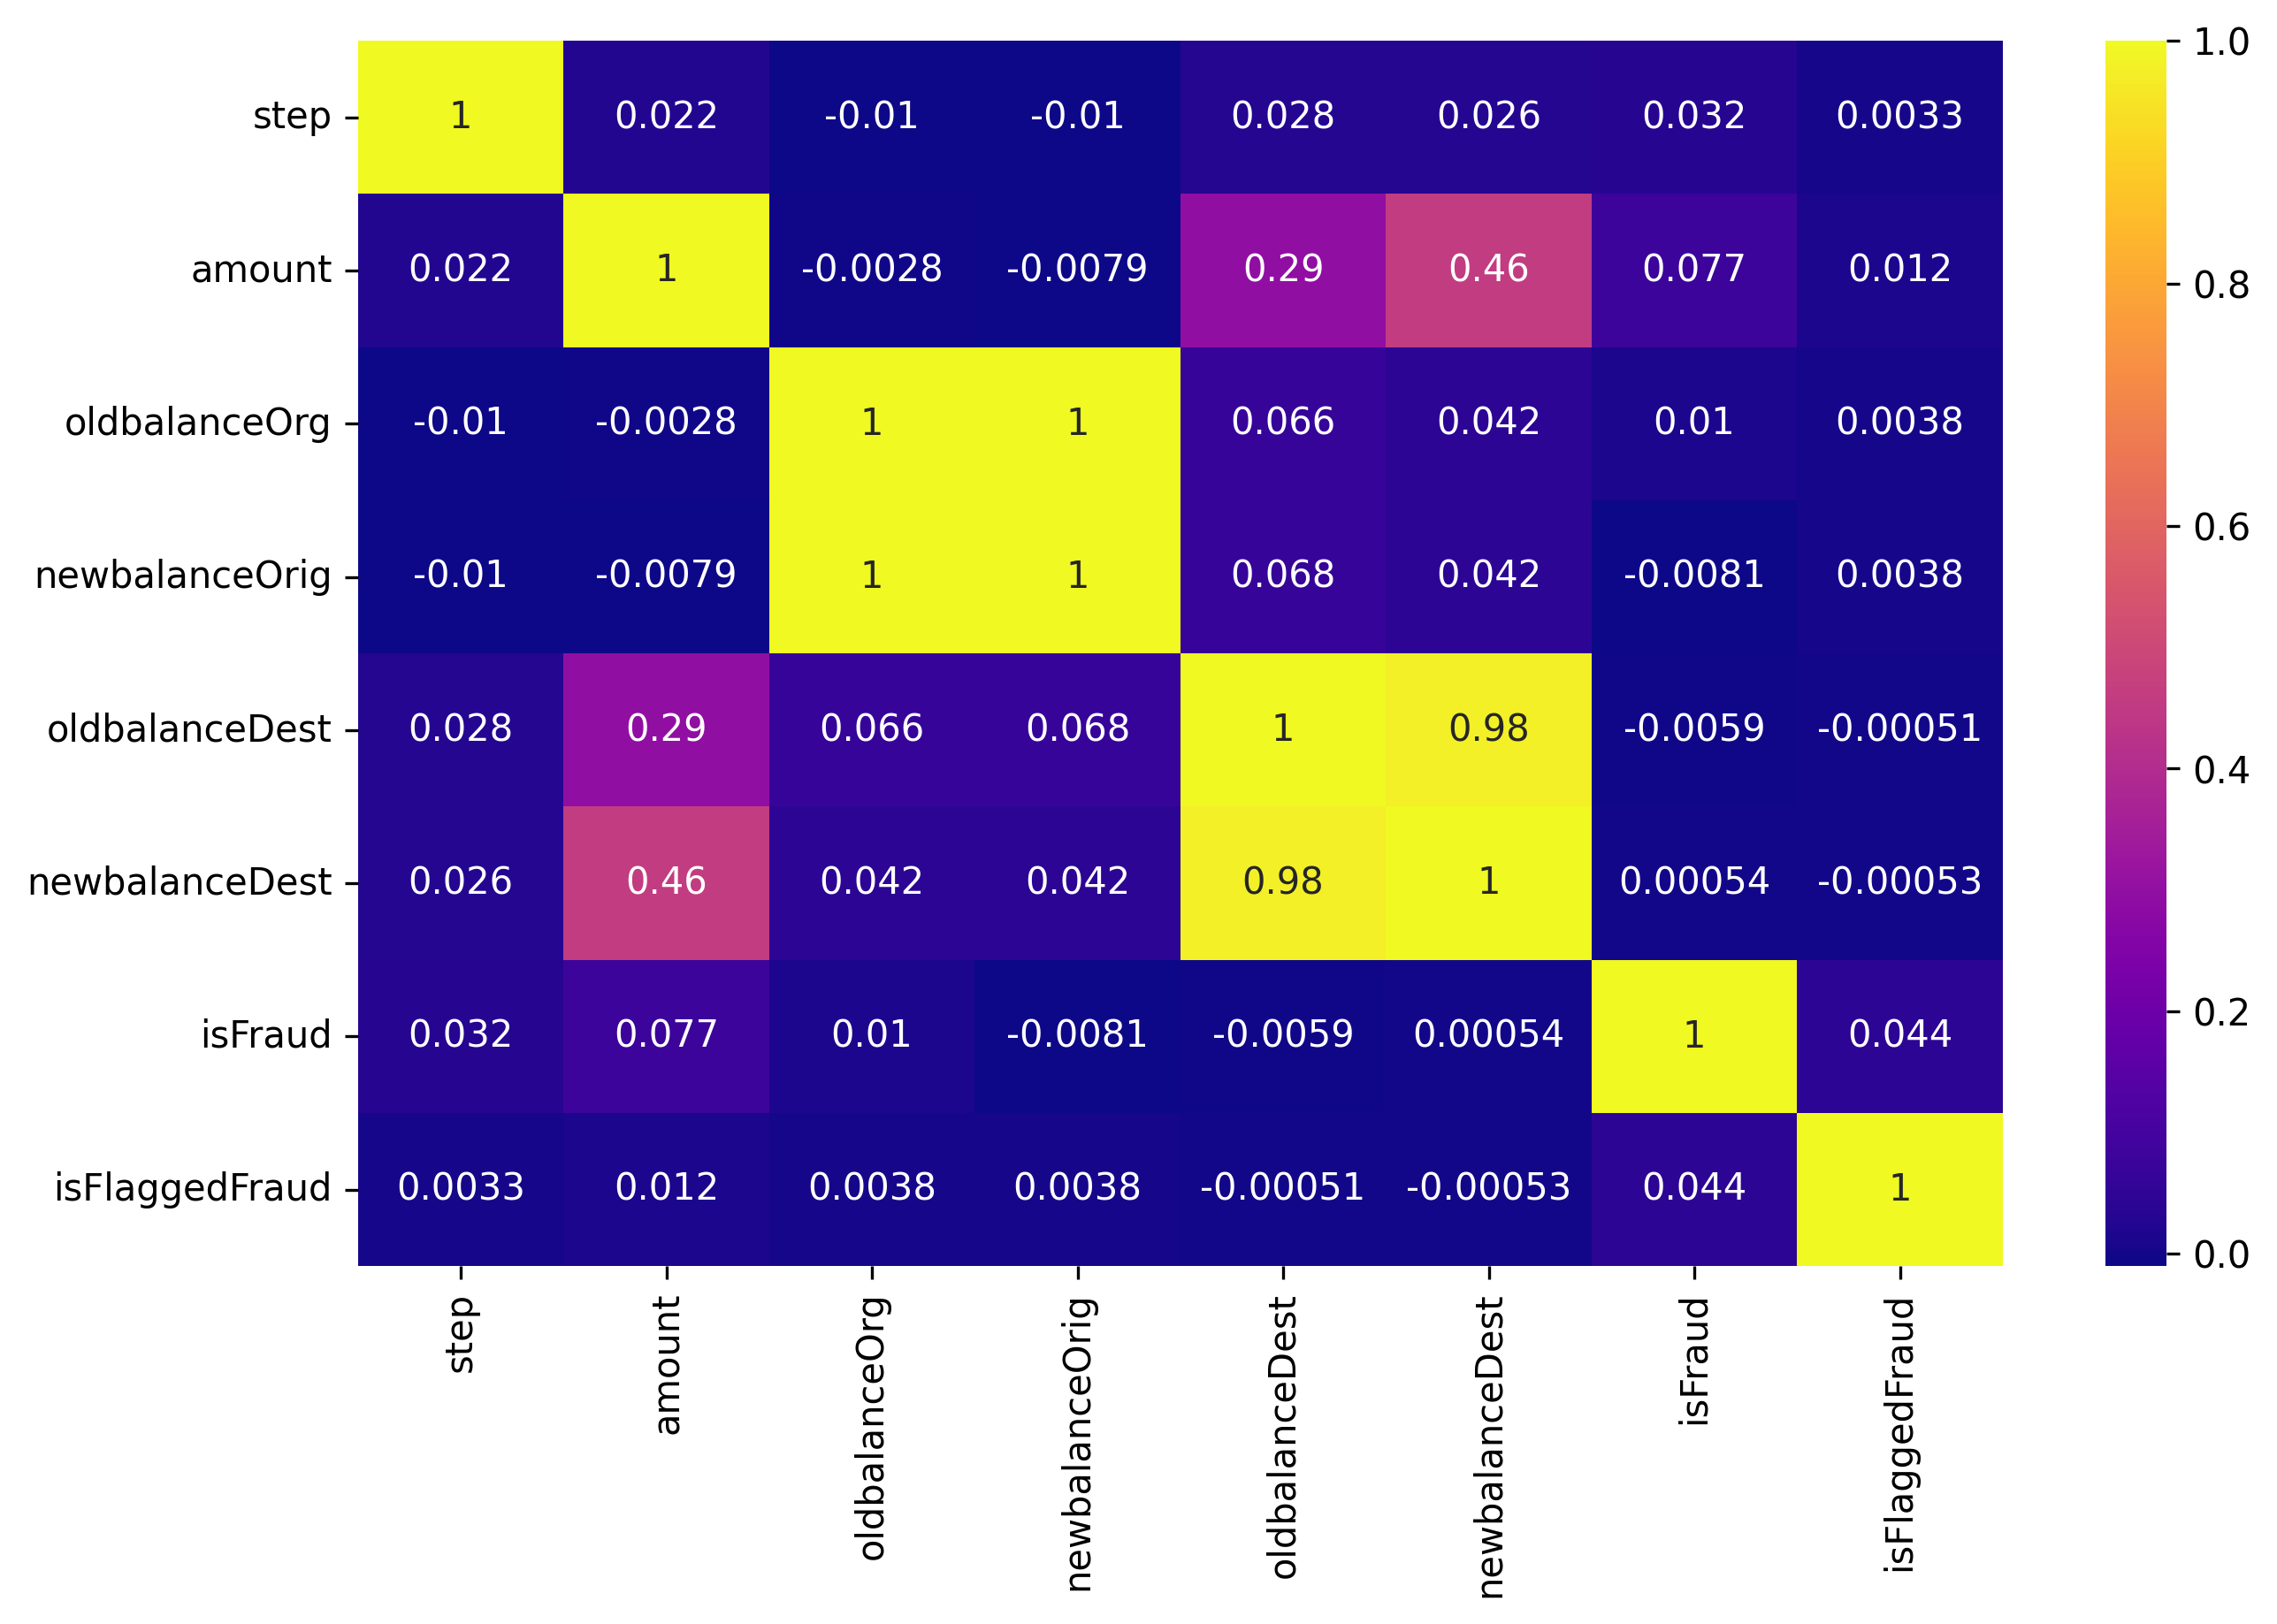

In [42]:
# 2. Handled multicollinearity by dropping correlated features (oldbalanceOrg, oldbalanceDest).

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.drop("type", axis = 1).corr()
plt.figure(figsize = (10, 6), dpi = 300,)
sns.heatmap(corr, annot = True, cmap = 'plasma')
plt.show()  

In [43]:
# OldbalanceOrg and NewbalanceOrig are highly correlated 

data = data.drop('oldbalanceOrg', axis = 1)  # Drop 'oldbalanceOrg'

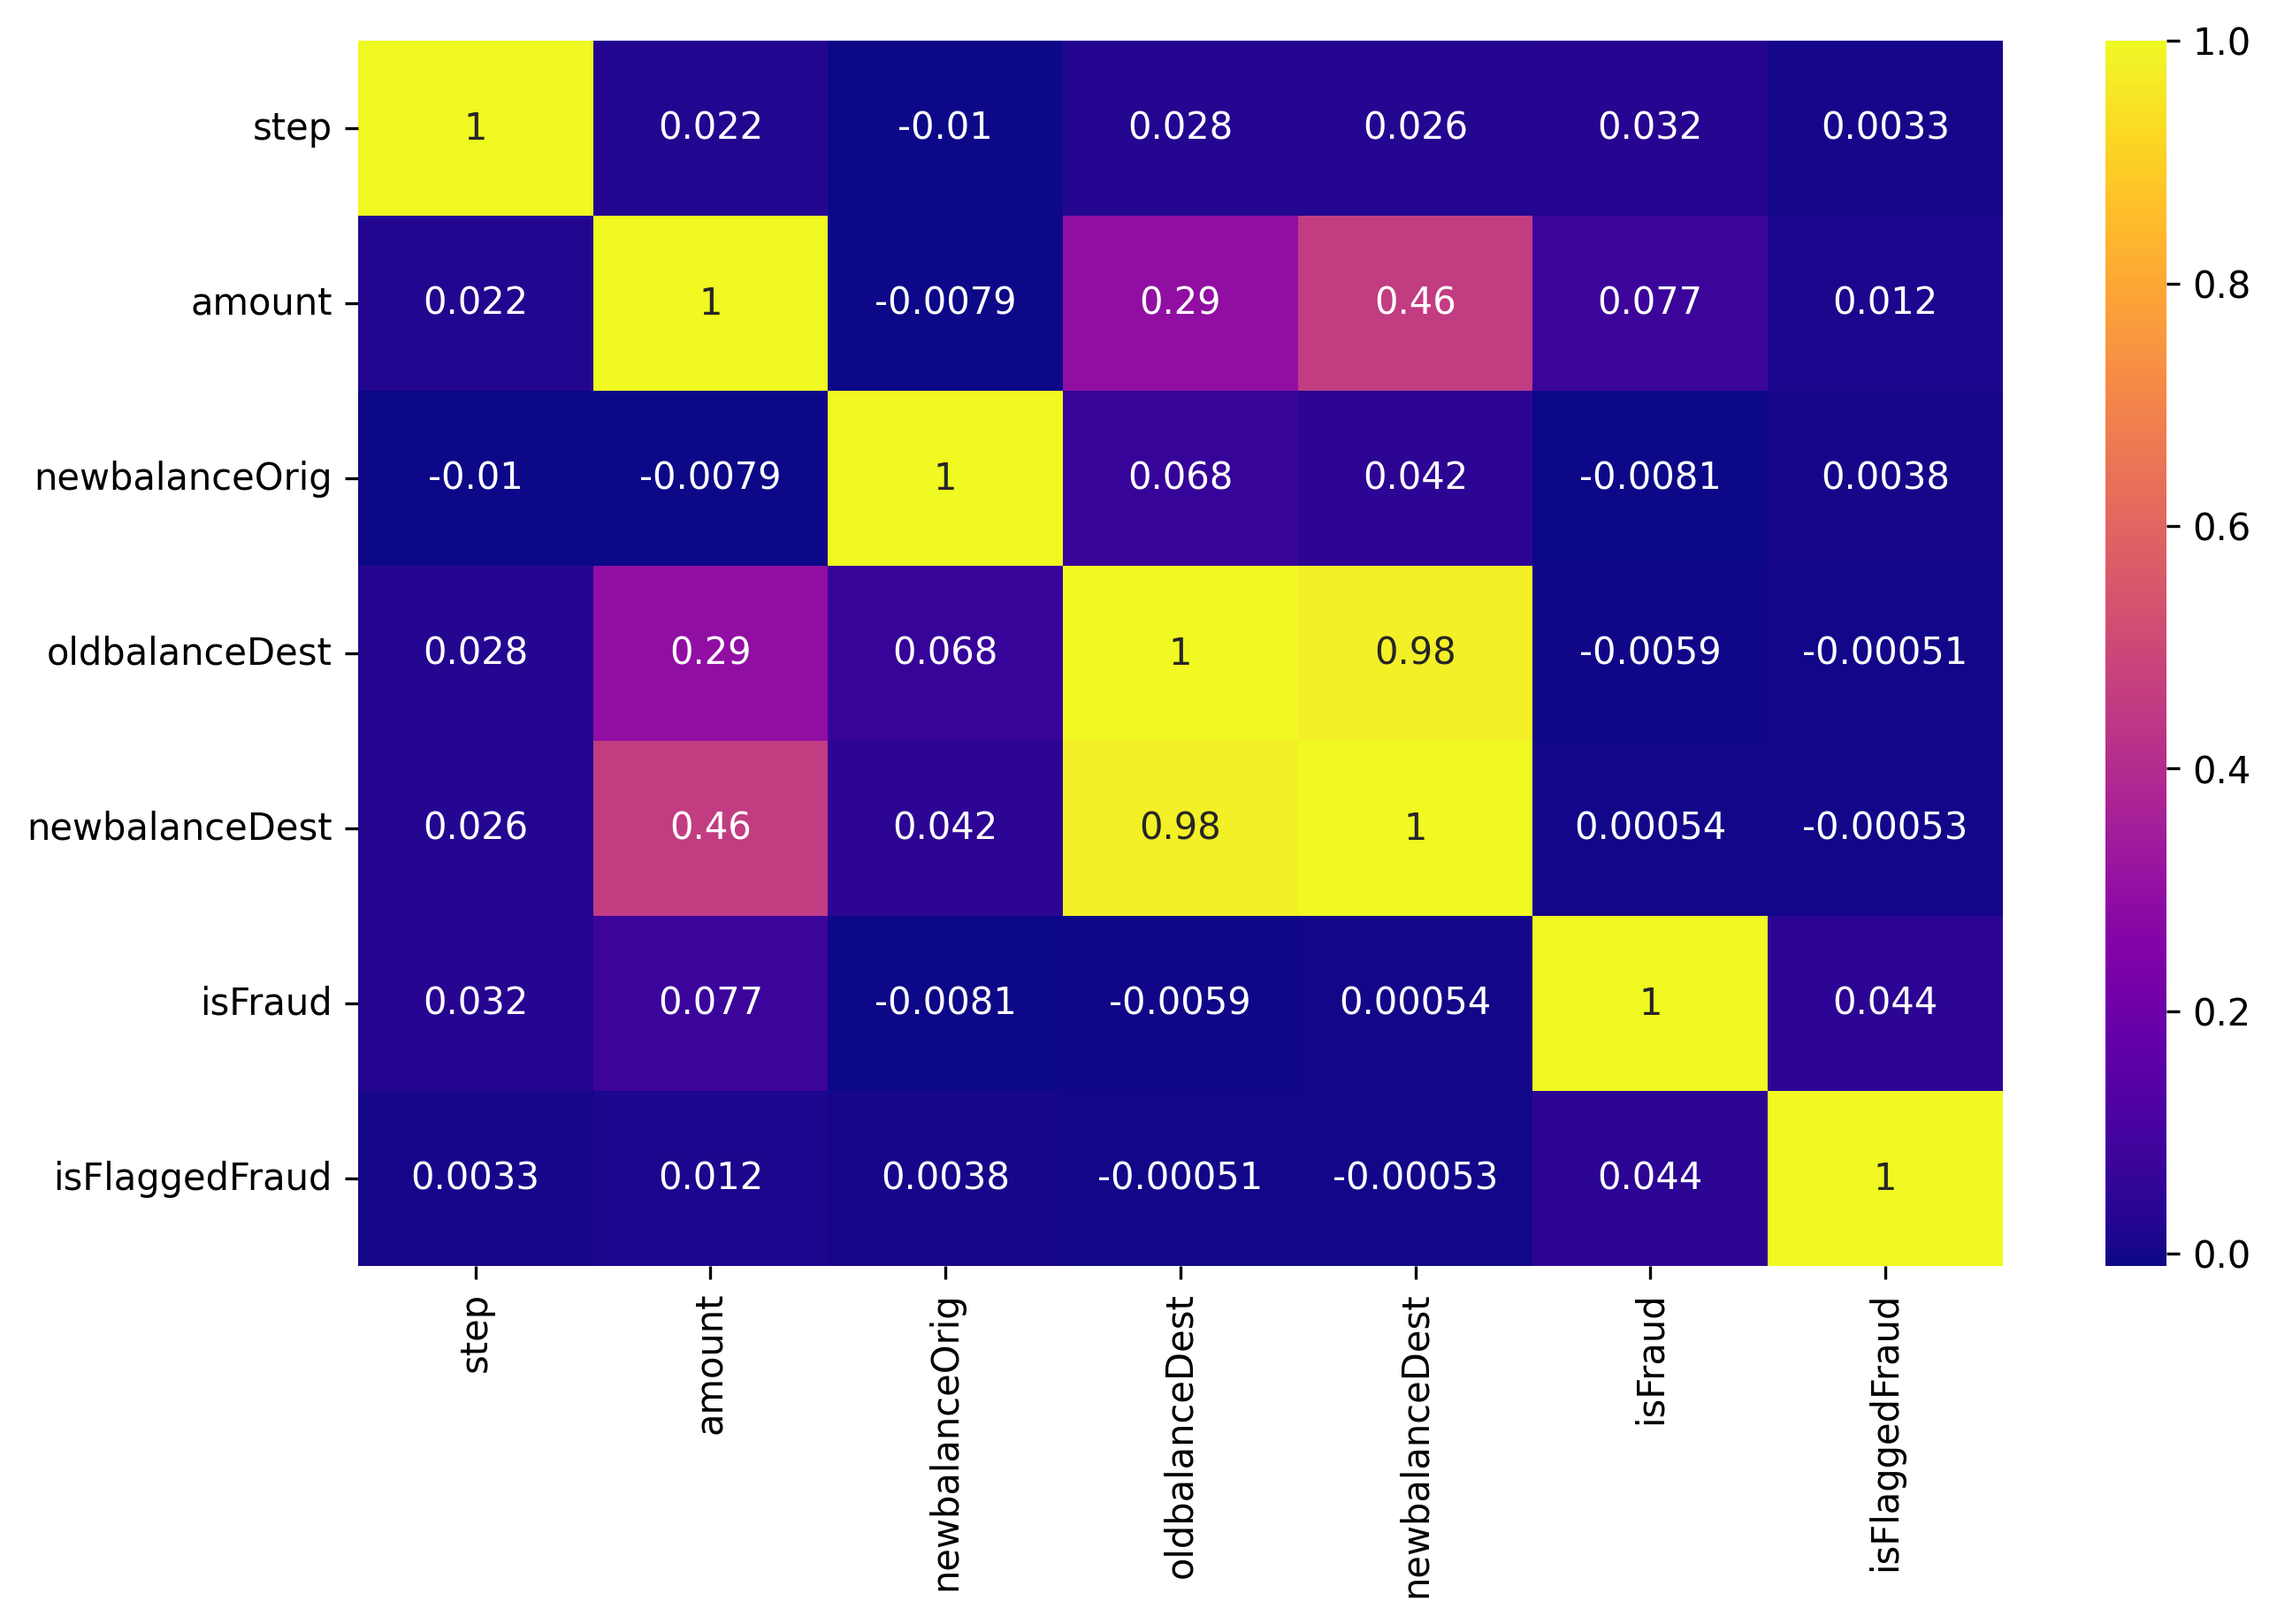

In [44]:
corr = data.drop("type", axis = 1).corr()
plt.figure(figsize = (10, 6), dpi = 300,)
sns.heatmap(corr, annot = True, cmap = 'plasma')
plt.show()

In [45]:
# OldbalanceDest and NewbalanceDest are highly correlated 

data['Dest_amount'] = data['newbalanceDest'] - data['oldbalanceDest'] # creating new feature and dropping "oldbalanceDest"
data = data.drop('oldbalanceDest', axis = 1)  

__ENCODING CATEGORICAL VARIABLES__

In [46]:
obj_type = data['type'].unique()
obj_type

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [47]:
# Categorical variables were encoded (e.g., transaction type) using Label Encoding.

from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data['type'] = encode.fit_transform(data.type)

In [48]:
num_type = data['type'].unique()
num_type

array([3, 4, 1, 2, 0])

In [49]:
data_dict = {}
for num, obj in zip(num_type, obj_type):
    data_dict[num] = obj
for i, j in data_dict.items():
    print(f"{i} ==> {j}")

3 ==> PAYMENT
4 ==> TRANSFER
1 ==> CASH_OUT
2 ==> DEBIT
0 ==> CASH_IN


In [50]:
data.head(8)

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,Dest_amount
0,1,3,9839.64,160296.36,0.0,0,0,0.0
1,1,3,1864.28,19384.72,0.0,0,0,0.0
2,1,4,181.00,0.00,0.0,1,0,0.0
3,1,1,181.00,0.00,0.0,1,0,-21182.0
4,1,3,11668.14,29885.86,0.0,0,0,0.0
5,1,3,7817.71,46042.29,0.0,0,0,0.0
6,1,3,7107.77,176087.23,0.0,0,0,0.0
7,1,3,7861.64,168225.59,0.0,0,0,0.0


__FEATURE SCALING__

In [51]:
# Creating a dupicate data for reference during prediction
# og_data = data.copy()  

In [52]:
data.columns

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'Dest_amount'],
      dtype='object')

In [53]:
# Scaled important features using Standard Scaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['amount', 'newbalanceOrig', 'newbalanceDest', 'Dest_amount']] = scaler.fit_transform(
    data[['amount', 'newbalanceOrig', 'newbalanceDest', 'Dest_amount']]
)

In [54]:
data.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,Dest_amount
0,1,3,-0.281560,-0.237622,-0.333411,0,0,-0.152896
1,1,3,-0.294767,-0.285812,-0.333411,0,0,-0.152896
2,1,4,-0.297555,-0.292442,-0.333411,1,0,-0.152896
3,1,1,-0.297555,-0.292442,-0.333411,1,0,-0.178952
4,1,3,-0.278532,-0.282221,-0.333411,0,0,-0.152896


- Multicollinearity was addressed by removing correlated columns.
- Initially, all columns were considered. Irrelevant columns (nameOrig, nameDest) were removed.
- New features like Dest_amount were created based on domain knowledge and understanding of transaction behaviors.

## 4. Training and Building Model

The machine learning model used is a Random Forest Classifier. This model is chosen due to its robustness, ability to handle imbalanced data, and good performance on fraud detection tasks.
- Training and Validation Split: The data was split into training, validation, and testing sets.
- Model: A Random Forest Classifier with balanced class weights was trained.

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score

x = data.drop("isFraud", axis = 1)
y = data['isFraud']

x_train_complete, x_test, y_train_complete, y_test = train_test_split(x, y, random_state = 42, stratify = y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_complete, y_train_complete, random_state = 42, stratify = y_train_complete, test_size = 0.25)

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (3817572, 7)
Validation data shape: (1272524, 7)
Testing data shape: (1272524, 7)


In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
#scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')

#print(f"Cross-validated scores: {scores}")
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)

The model used is a Random Forest Classifier, which builds multiple decision trees and combines them for better accuracy. It handles imbalanced data effectively using class weighting.

## 5. Metrics (Performance Evaluation)

The performance of the model is evaluated using:

- **Accuracy**: Measures the overall correctness of predictions.
- **Confusion Matrix**: Provides insight into True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
- **Classification Report**: Includes precision, recall, F1-score, and support for each class.

__Model's performance on Validation Data__

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print(f"Tuned Model Validation Accuracy: {int(accuracy_score(y_val, y_val_pred) * 100)}%")
print()
print(f"Classification Report:\n {classification_report(y_val, y_val_pred)}")

Tuned Model Validation Accuracy: 99%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270882
           1       0.97      0.67      0.80      1642

    accuracy                           1.00   1272524
   macro avg       0.99      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



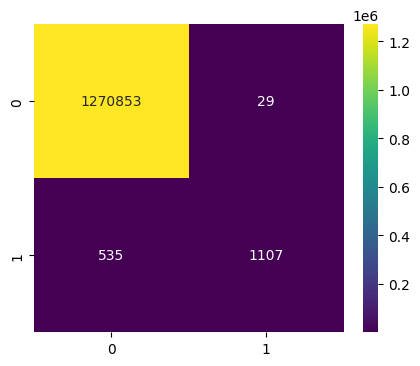

In [58]:
plt.figure(figsize = (5, 4), dpi = 100)
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cmap = 'viridis', fmt = 'd')
plt.show()

__Model's performance on Test Data (Unseen Data)__

In [59]:
y_test_pred = model.predict(x_test)

In [60]:
# ACCURACY

print(f"Test Accuracy: {int(accuracy_score(y_test, y_test_pred) * 100)}%")

Test Accuracy: 99%


Confusion Matrix:



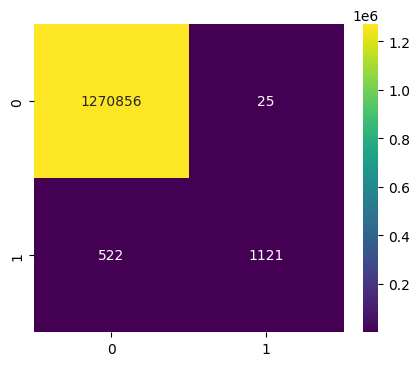

In [61]:
# CONFUSION MATRIX

print("Confusion Matrix:\n")
plt.figure(figsize = (5, 4), dpi = 100)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'viridis', fmt = 'd')
plt.show()

In [62]:
# CLASSIFICATION REPORT

print(f"Classification Report:\n {classification_report(y_test, y_test_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.68      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [63]:
# ROC-AOC score

print(f"ROC-AOC score: {int(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]) * 100)}%")

ROC-AOC score: 94%


## 6. Prediction

__Key Factors that predict fraudulent customers__

- Transaction Type (`type`): Certain transaction types, like `TRANSFER` and `CASH_OUT`, are more prone to fraud.
- Transaction Amount (`amount`): Larger transactions are often more likely to be fraudulent.
- Balances (`newbalanceOrig`, `newbalanceDest`): Unusual balance changes can indicate fraud.
- Is Flagged as Fraud (`isFlaggedFraud`): A transaction already flagged by the system as suspicious is likely fraudulent.

In [76]:
import numpy as np
print("FRAUD TRANSACTION PREDICTION:")
print()
num_transactions = int(input("How many transactions would you like to check for fraud? "))
print()
user_data = []

for _ in range(num_transactions):
    step = int(input("1. Please enter the time step of the transaction (a number representing time in the data): "))
    type_transaction = int(input("2. Please select the type of transaction (enter the corresponding number):\n"
                                 "0 ==> CASH_IN\n"
                                 "1 ==> CASH_OUT\n"
                                 "2 ==> DEBIT\n"
                                 "3 ==> PAYMENT\n"
                                 "4 ==> TRANSFER\n  Your choice: "))
    amount = float(input("3. Enter the transaction amount: "))
    newBalOrg = float(input("4. Enter the balance of the sender's account after the transaction: "))
    newBalDest = float(input("5. Enter the balance of the receiver's account after the transaction: "))
    flaggedFraud = int(input("6. Has this transaction been flagged by the system as suspicious? (0 for No, 1 for Yes): "))
    destAmount = float(input("7. Enter the amount left in the receiver’s account after the transaction: "))
    user_data.append([step, type_transaction, amount, newBalOrg, newBalDest, flaggedFraud, destAmount])
    print()

user_input_df = pd.DataFrame(user_data, columns=['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFlaggedFraud', 'Dest_amount'])
user_input_df[['amount', 'newbalanceOrig', 'newbalanceDest', 'Dest_amount']] = scaler.transform(user_input_df[['amount', 'newbalanceOrig', 'newbalanceDest', 'Dest_amount']])

predictions = model.predict(user_input_df)

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Transaction {i+1} is predicted as FRAUD.")
    else:
        print(f"Transaction {i+1} is predicted as NOT FRAUD.")


FRAUD TRANSACTION PREDICTION:



How many transactions would you like to check for fraud?  2


1. Please enter the time step of the transaction (a number representing time in the data):  1
2. Please select the type of transaction (enter the corresponding number):
0 ==> CASH_IN
1 ==> CASH_OUT
2 ==> DEBIT
3 ==> PAYMENT
4 ==> TRANSFER
  Your choice:  2
3. Enter the transaction amount:  500000
4. Enter the balance of the sender's account after the transaction:  1200
5. Enter the balance of the receiver's account after the transaction:  0
6. Has this transaction been flagged by the system as suspicious? (0 for No, 1 for Yes):  0
7. Enter the amount left in the receiver’s account after the transaction:  500000


1. Please enter the time step of the transaction (a number representing time in the data):  743
2. Please select the type of transaction (enter the corresponding number):
0 ==> CASH_IN
1 ==> CASH_OUT
2 ==> DEBIT
3 ==> PAYMENT
4 ==> TRANSFER
  Your choice:  1
3. Enter the transaction amount:  850002.52
4. Enter the balance of the sender's account after the transaction:  0.0
5. Enter the balance of the receiver's account after the transaction:  7360101.63
6. Has this transaction been flagged by the system as suspicious? (0 for No, 1 for Yes):  1
7. Enter the amount left in the receiver’s account after the transaction:  850002.52



Transaction 1 is predicted as NOT FRAUD.
Transaction 2 is predicted as FRAUD.


#### Possible Preventions

- Implement real-time transaction monitoring.
- Adopt two-factor authentication for high-risk transactions.
- Set transaction limits based on customer behavior.
- Regularly update the fraud detection model with new data.
- Ensure data encryption to protect sensitive information.

## 7. Conclusion

- Due to my system's limitations, I chose not to use Neural Networks and Cross-Validation techniques. This decision was made to ensure the project ran smoothly without overloading the hardware. Despite this, the alternative methods used still produced strong and reliable results.
- The fraud detection model provides a robust solution for identifying fraudulent transactions with high accuracy. By implementing preventative measures and continuously improving the model, companies can minimize the impact of fraudulent activities.
